# Oil Wells Profit Prediction 
---

The project task is to find the most profitable place for OilyGiant's new well. Three regions will be examined. The following steps will be taken:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves
- Build a model for predicting the volume of reserves in the new wells
- Pick the oil wells with the highest estimated values
- Pick the region with the highest total profit for the selected oil wells

### Part One: Prepare the Data
---

In [436]:
# Install Necessary Packages 

# Data Prep Packages 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Model Assessment Package 
from sklearn.metrics import  mean_squared_error

# Visualization package 
import matplotlib.pyplot as plt

In [437]:
# Read in the data 
try:
    # Attempt to read the data
    r0 = pd.read_csv('datasets/geo_data_0.csv')
    r1 = pd.read_csv('datasets/geo_data_1.csv')
    r2 = pd.read_csv('datasets/geo_data_2.csv')
    # If successful, print Confirmation
    print("The data has been read in as r0, r1, and r2.")
except Exception as e:
    # If an error occurs, print an error message
    print("Error reading data:", e)
    print("To get the data sets please visit: https://github.com/le-crupi64/Oil-Well-Profit-Prediction")

The data has been read in as r0, r1, and r2.


#### Check for any data cleanliness issues

In [438]:
r0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [439]:
r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [440]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [441]:
# Check for duplicated rows and ids 
# Region 0
print("Duplicated rows in r0: ", r0.duplicated().sum())
print("Duplicated ids in r0: ", r0['id'].duplicated().sum())

# Region 1
print("Duplicated rows in r1: ", r1.duplicated().sum())
print("Duplicated ids in r1: ", r1['id'].duplicated().sum())

# Region 2
print("Duplicated rows in r2: ", r2.duplicated().sum())
print("Duplicated ids in r2: ", r2['id'].duplicated().sum())

Duplicated rows in r0:  0
Duplicated ids in r0:  10
Duplicated rows in r1:  0
Duplicated ids in r1:  4
Duplicated rows in r2:  0
Duplicated ids in r2:  4


**Data Cleanliness Findings**
- All three data sets have no null values and all columns are in the appropriate data type
- All three data sets have duplicates in the id column, but the rows have unique features. 

Corrective Action: Leave the rows but drop the id column, as it can not be passed into the linear regression model

#### Statistical Data Analysis 

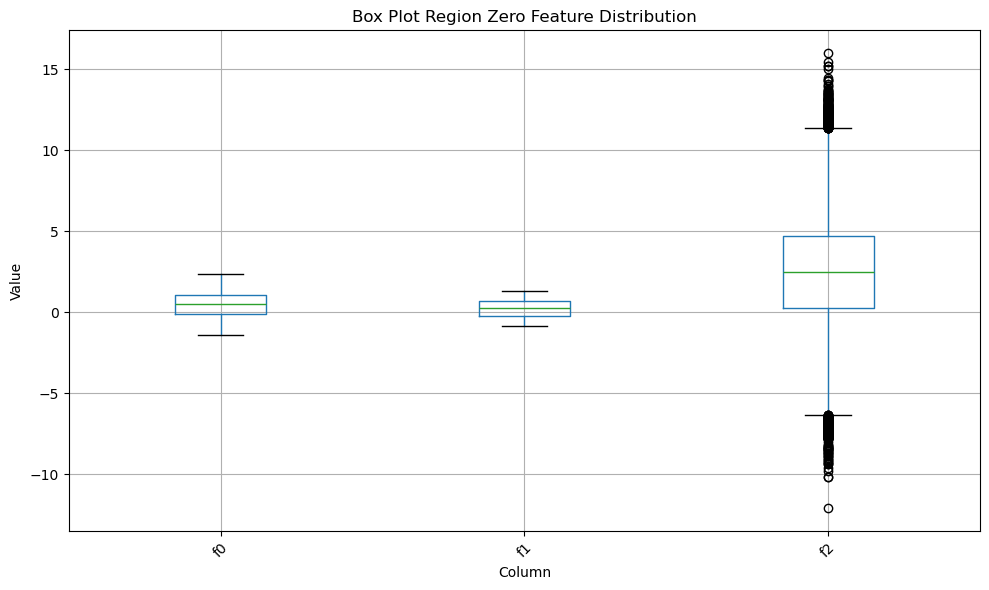

In [442]:
# Create a Box Plot for Region Zero Features 
columns_to_plot = ['f0', 'f1', 'f2']

# Extract data for the specified columns
data_to_plot = r0[columns_to_plot]

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
data_to_plot.boxplot()

# Customize plot
plt.title('Box Plot Region Zero Feature Distribution')
plt.ylabel('Value')
plt.xlabel('Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

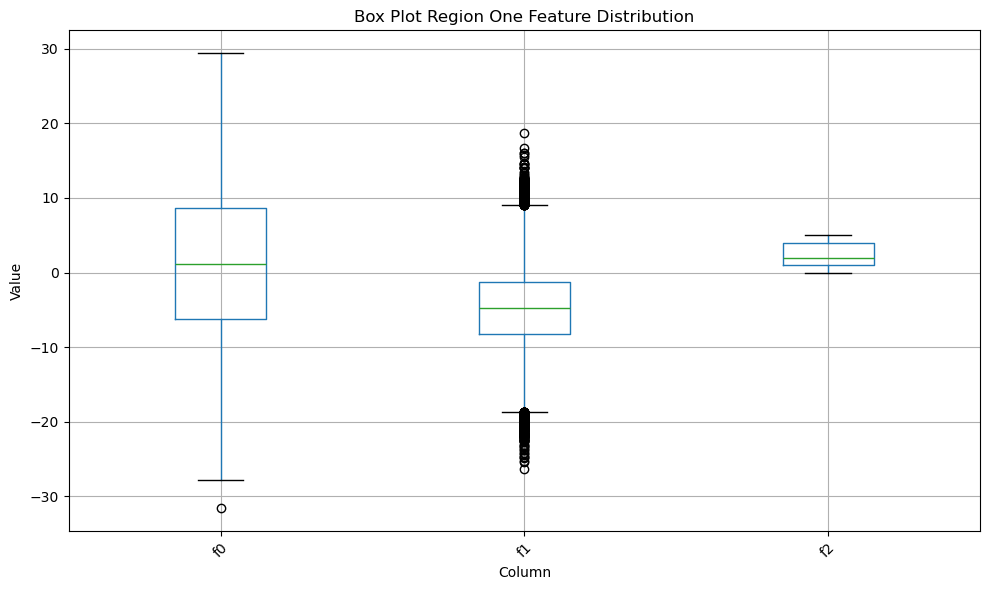

In [443]:
# Create a Box Plot for Region one Features 
columns_to_plot = ['f0', 'f1', 'f2']

# Extract data for the specified columns
data_to_plot = r1[columns_to_plot]

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
data_to_plot.boxplot()

# Customize plot
plt.title('Box Plot Region One Feature Distribution')
plt.ylabel('Value')
plt.xlabel('Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

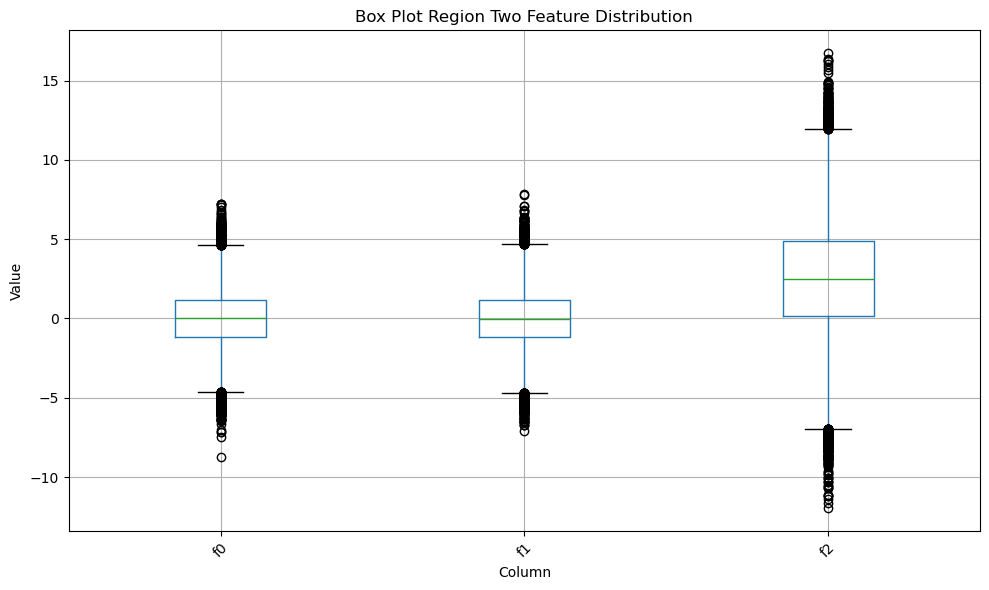

In [444]:
# Create a Box Plot for Region Two Features 
columns_to_plot = ['f0', 'f1', 'f2']

# Extract data for the specified columns
data_to_plot = r2[columns_to_plot]

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
data_to_plot.boxplot()

# Customize plot
plt.title('Box Plot Region Two Feature Distribution')
plt.ylabel('Value')
plt.xlabel('Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Findings:** 
Due to the difference in the scale of the various features for all three data sets, the data should be scaled. 

#### Scaling and Splitting the Data 

**Prepare the Region Zero Data Set**

In [445]:
# Split the r0 data set into features and target
target = r0['product']
features = r0.drop(['product', 'id'], axis = 1)


In [446]:
# Scale numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

print(target.shape)
print(features.shape)

(100000,)
(100000, 3)


In [447]:
# Split into training and validation sets
r0_features_train, r0_features_valid, r0_target_train, r0_target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Check Set shapes 
print('features_train size: ', r0_features_train.shape)
print('target_train size: ', r0_target_train.shape)
print('features_valid size: ', r0_features_valid.shape)
print('target_valid size: ', r0_target_valid.shape)

features_train size:  (75000, 3)
target_train size:  (75000,)
features_valid size:  (25000, 3)
target_valid size:  (25000,)


**Prepare the Region One Data Set**

In [448]:
# Split the r1 data set into features and target
target = r1['product']
features = r1.drop(['product', 'id'], axis = 1)

In [449]:
# Scale Numeric Features

# Scale numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [450]:
# Split into training and validation sets
r1_features_train, r1_features_valid, r1_target_train, r1_target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Check Set shapes 
print('features_train size: ', r1_features_train.shape)
print('target_train size: ', r1_target_train.shape)
print('features_valid size: ', r1_features_valid.shape)
print('target_valid size: ', r1_target_valid.shape)

features_train size:  (75000, 3)
target_train size:  (75000,)
features_valid size:  (25000, 3)
target_valid size:  (25000,)


**Prepare the Region Two Data Set**

In [451]:
# Split the r1 data set into features and target
target = r2['product']
features = r2.drop(['product', 'id'], axis = 1)

In [452]:
# Scale numerical features
scaler = StandardScaler()
features = scaler.fit_transform(features)

print(target.shape)
print(features.shape)

(100000,)
(100000, 3)


In [453]:
# Split into training and validation sets
r2_features_train, r2_features_valid, r2_target_train, r2_target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Check Set shapes 
print('features_train size: ', r2_features_train.shape)
print('target_train size: ', r2_target_train.shape)
print('features_valid size: ', r2_features_valid.shape)
print('target_valid size: ', r2_target_valid.shape)

features_train size:  (75000, 3)
target_train size:  (75000,)
features_valid size:  (25000, 3)
target_valid size:  (25000,)


### Part Two: Train the Model and Make Predictions for Each Region 
---

#### Region Zero 

In [454]:

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Perform grid search with cross-validation
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(r0_features_train, r0_target_train)

# Get the best Ridge regression model from grid search
best_ridge_model = grid_search.best_estimator_

# Make predictions on the validation data using the best model
r0_predictions = best_ridge_model.predict(r0_features_valid)

# Calculate RMSE
mse = mean_squared_error(r0_target_valid, r0_predictions)
rmse = np.sqrt(mse)

print('Average Volume of Predicted Reserves for Region 0: ', r0_predictions.mean())
print("Model RMSE: ", rmse)

Average Volume of Predicted Reserves for Region 0:  92.59257976966408
Model RMSE:  37.57943662739953


#### Region One

In [455]:
r1_model = LinearRegression()

r1_model.fit(r1_features_train, r1_target_train)

r1_predictions = r1_model.predict(r1_features_valid)

# Calculate the RMSE
mse = mean_squared_error(r1_target_valid, r1_predictions)
rmse = np.sqrt(mse)

print('Average Volume of Predicted Reserves for Region One: ', r1_predictions.mean())
print("Model RMSE: ", rmse)

Average Volume of Predicted Reserves for Region One:  68.728546895446
Model RMSE:  0.893099286775617


#### Region Two

In [456]:
r2_model = LinearRegression()

r2_model.fit(r2_features_train, r2_target_train)

r2_predictions = r2_model.predict(r2_features_valid)

# Calculate the RMSE
mse = mean_squared_error(r2_target_valid, r2_predictions)
rmse = np.sqrt(mse)

print('Average Volume of Predicted Reserves for Region One: ', r2_predictions.mean())
print("Model RMSE: ", rmse)

Average Volume of Predicted Reserves for Region One:  94.96504596800489
Model RMSE:  40.02970873393434


### Part Three: Profit Calculations
---

### Part Four: Calculate Risks and Profit for Each Region
---

### Final Recommendations 
---